In [1]:
#usual imports
import pandas as pd
import numpy as np

#import class
from resampled import Resample

#viz libs
import seaborn as sns
import matplotlib.pyplot as plt

## Data structure  
Assume that we run 10 tests at 3 different humidity conditions and measure output voltage from our apparatus. 

In [2]:
#import data
data = pd.read_csv('test_data1.csv')
data

,ID,Humidity,Voltage
0,1,60,65
1,2,60,40
2,3,60,80
3,4,60,90
4,5,60,90
5,6,60,100
6,7,60,65
7,8,60,90
8,9,60,80
9,10,60,100


## Bootstrap statistical test

In [3]:
#instanciate with bootstrap resampling
btrs = Resample(resampling_method = 'bootstrap')

In [4]:
#pull docstring to help run the test
btrs.run_hypothesis?

Signature: btrs.run_hypothesis(df, target, levels, lvl1, lvl2, R, func)
Docstring:
Parameters
----------
df : PANDAS dataframe
    Entire dataset.
target : str
    Feature/column name that contains the data 
levels : str
    Feature/column name describing the categories in which the 
    measurements are divided.            
lvl1 : str/int/float
    One of the levels/categories of interest inside the condition_feature.
lvl2 : str/in/float
    The second of the levels/categories of interest which is compared to 1.
R : int
    number of bootstrap or permutation samples to generate.
func : any user coded or numpy/scipy or module imported function that calculates the statistic of interest.
    The function can also be defined externally. e.g. 
    def my_func(x):
        return np.percentile(x,q=33.33)
    run_hypothesis(df,'target_feature','levels_feature',level_1,level_2,R=10000,func=my_func)
OR:
    run_hypothesis(df,'target_feature','levels_feature',level_1,level_2,R=10000,func=np.mean

In the present dataset `target` is identified as `Voltage`, measured at 3 different `levels` of `Humidity` 60, 40, and 20. Let's run a test to see if we have evidence to believe that the difference of the means of `Voltage` at 60 and 40 % humidity is statistically indistinguishable.

In [5]:
resampled, resampled_diff, pval = btrs.run_hypothesis(data, 'Voltage', 'Humidity', 60, 40, R = 3000, func = np.mean)

In [6]:
resampled

,Humidity,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000
0,60,70,65,85,85,70,40,90,85,80,...,40,70,40,70,80,70,80,70,65,80
1,60,70,80,100,85,80,40,80,100,40,...,90,90,70,85,25,25,80,90,70,75
2,60,40,70,70,70,40,40,70,100,65,...,90,65,40,85,40,25,65,70,65,80
3,60,65,90,85,65,25,75,70,65,90,...,70,85,85,80,90,65,70,80,65,85
4,60,100,65,70,80,100,100,65,80,40,...,70,80,90,65,90,90,70,70,65,80
5,60,70,70,85,75,40,70,70,65,80,...,80,65,100,85,80,85,65,65,70,80
6,60,75,70,90,100,80,80,70,40,40,...,90,40,90,100,40,40,90,100,40,70
7,60,65,90,80,90,70,100,65,65,65,...,100,25,65,25,90,90,85,40,65,100
8,60,90,65,70,70,40,65,80,40,90,...,90,40,65,70,90,100,40,80,100,80
9,60,25,40,40,90,70,80,70,90,100,...,40,65,80,40,75,65,100,65,90,70


This is a good method to observe the null hypothesis, $H_{o}$, in action. The method draws samples with replacement and without changing the indexed levels places the samples next to them. The heart of the hypothesis lies in the fact that if it holds true the level doesn't have an impact on the statistic.

In [7]:
def plot_resampled(rs_diff, obs_diff_stat, pval):
    """
    plotting function for the distribution of resampled differences  
    """
    #estimate the y-point at which the cutoff will be plotted
    yp=np.abs(len(rs_diff[rs_diff > np.percentile(rs_diff, 45)])-
                  len(rs_diff[rs_diff > np.percentile(rs_diff, 55)]))
        
        
    plt.figure()
    sns.displot(rs_diff, kde = False)
    plt.plot([obs_diff_stat, obs_diff_stat], [0, yp], '--r', label = 'Obs. Diff. of statistic')
    plt.xlabel("Difference of statistic of bootstrapped samples")
    plt.title('p-value of hypothesis testing: ' + str(pval))
    plt.legend();

In [8]:
#calculate observed difference of means
x = data[data['Humidity'] == 60]['Voltage']
y = data[data['Humidity'] == 40]['Voltage']
obs_diff_stat = np.mean(x)-np.mean(y)

<Figure size 432x288 with 0 Axes>

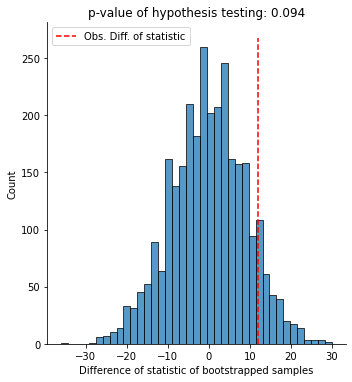

In [9]:
plot_resampled(resampled_diff, obs_diff_stat, pval.round(3))

Conclusion: the p-value and resulting histogram informs that we have evidence to believe that the means of `Voltage` at 60 and 40 % `Humidity` are statistically equal at $\alpha=0.05$ level.   
Let's do one more comparison. 

In [10]:
resampled_, resampled_diff_, pval_ = btrs.run_hypothesis(data, 'Voltage', 'Humidity', 60, 20, R = 3000, func = np.mean)

In [11]:
pval_

0.0023333333333333335

In [12]:
#calculate observed difference of means
x = data[data['Humidity'] == 60]['Voltage']
y = data[data['Humidity'] == 20]['Voltage']
obs_diff_stat = np.mean(x) - np.mean(y)

<Figure size 432x288 with 0 Axes>

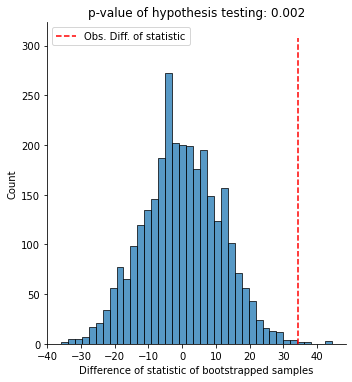

In [13]:
plot_resampled(resampled_diff_,obs_diff_stat,pval_.round(3))

This time we can reject null, we have evidence to claim that the two conditions produce statistically different means.  

### Estimation of confidence intervals

In [14]:
btrs.estimate_ci?

Signature: btrs.estimate_ci(df, target, levels, lvl, R, func, alpha_level=0.05)
Docstring:
Parameters
----------
df : Pandas DataFrame
    Dataframe contaning the data.
level : str/int/float
    One of the levels/categories of interest inside the levels feature.
R : int
    Number of bootstrap samples to be generated.
func : any user coded or numpy/scipy or module imported function that calculates the statistic of interest.
    The function can also be defined externally. e.g. 
    def my_func(x):
        return np.percentile(x,q=33.33)
    run_hypothesis(df,'target_feature','levels_feature',level_1,level_2,R=10000,func=my_func)
OR:
    run_hypothesis(df,'target_feature','levels_feature',level_1,level_2,R=10000,func=np.mean)

alpha_level : int
    Percentage (0,100)  for statistical confidence interval. The default is 5.

Returns
-------
bootstrapped_stat: PANDAS Series
    R statisticts estimated from each bootstrapped sample. Returned explicitly for post processing,
    e.g. plot and

In [15]:
#estimate 95% ci of the mean of Voltage for 60%, 40% humidity 
boot_stat1, ci1 = btrs.estimate_ci(data, 'Voltage', 'Humidity', 60, R=3000, func=np.mean)
boot_stat2, ci2 = btrs.estimate_ci(data, 'Voltage', 'Humidity', 40, R=3000, func=np.mean)

In [16]:
ci1, ci2

((90.0, 68.0), (79.5, 55.0))

The calculation of the 95% c.i. for both conditions confirm the result of the hypothesis testing since c.i.s overlap significantly.  
Let's calculate the 95% c.i. of the median for one condition 

In [17]:
boot_stat, ci = btrs.estimate_ci(data, 'Voltage', 'Humidity', 60, R = 3000, func = np.median)

In [18]:
ci

(95.0, 65.0)

## Permutation Statistical Test

We now turn to perform the same test with the resampling method set to `permutation`.

In [19]:
# Permutation type (without replacement) resampling
prs = Resample(resampling_method = 'permutation')
resampled_pt, resampled_diff_pt, pval_pt = prs.run_hypothesis(data, 'Voltage', 'Humidity', 60, 40, R = 3000, func = np.mean)

<Figure size 432x288 with 0 Axes>

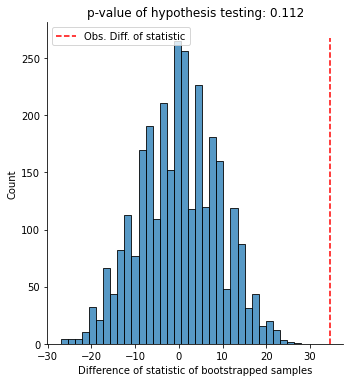

In [20]:
plot_resampled(resampled_diff_pt, obs_diff_stat, pval_pt.round(3))

The two tests (bootstrapping and permutation) for the same conditions are in agreement.  

The permutation approach allows to use any custom defined statistic function to run the test. Let's use the 1/3 percentile. 

In [21]:
#custom function to demonstrate how it is passed in the Resampled run_hypothesis method
# any statistic can defined here
def my_stat(x):
    return np.percentile(x, q = 33.33)

In [22]:
resampled_pt, resampled_diff_pt, pval_pt = prs.run_hypothesis(data, 'Voltage', 'Humidity', 60, 40, R = 3000, func = my_stat)

In [23]:
pval_pt

0.16833333333333333

What if I have only 1 condition in my data? Let's see another structure.

In [24]:
data2 = pd.read_csv('test_data2.csv')
data2

,ID,Voltage1,Voltage2,Voltage3
0,1,35,45,75
1,2,80,85,90
2,3,70,70,70
3,4,60,55,80
4,5,90,75,90
5,6,70,100,45
6,7,70,45,100
7,8,60,60,100
8,9,80,75,100
9,10,35,45,75


A trick to use the class is to create a `dummy` variable at a single level.

In [25]:
data2['dummy'] = 0
data2

,ID,Voltage1,Voltage2,Voltage3,dummy
0,1,35,45,75,0
1,2,80,85,90,0
2,3,70,70,70,0
3,4,60,55,80,0
4,5,90,75,90,0
5,6,70,100,45,0
6,7,70,45,100,0
7,8,60,60,100,0
8,9,80,75,100,0
9,10,35,45,75,0


In [26]:
btrs2 = Resample(resampling_method = 'bootstrap')

In [27]:
boot_stat, ci = btrs2.estimate_ci(data2, 'Voltage2', 'dummy', 0, R = 1000, func = np.mean)

In [28]:
ci

(77.5, 55.0)

What about a hypothesis test? Rework quickly the data to a long format. Here we create a `rank` dummy variable to indicate which Voltage we are using.

In [29]:
V1 = data2[['Voltage1']].rename(columns={'Voltage1':'V'})
V1['rank'] = 1
V2 = data2[['Voltage2']].rename(columns={'Voltage2':'V'})
V2['rank'] = 2
V12 = pd.concat([V1, V2], axis = 0, ignore_index = True)
V12

,V,rank
0,35,1
1,80,1
2,70,1
3,60,1
4,90,1
5,70,1
6,70,1
7,60,1
8,80,1
9,35,1


In [30]:
resampled, resampled_diff, pval = btrs2.run_hypothesis(V12, 'V', 'rank', 1, 2, R = 3000, func = np.mean)
pval

0.537